In [1]:
print("hello world")

hello world


In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris  # a classic dataset available in sklearn
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

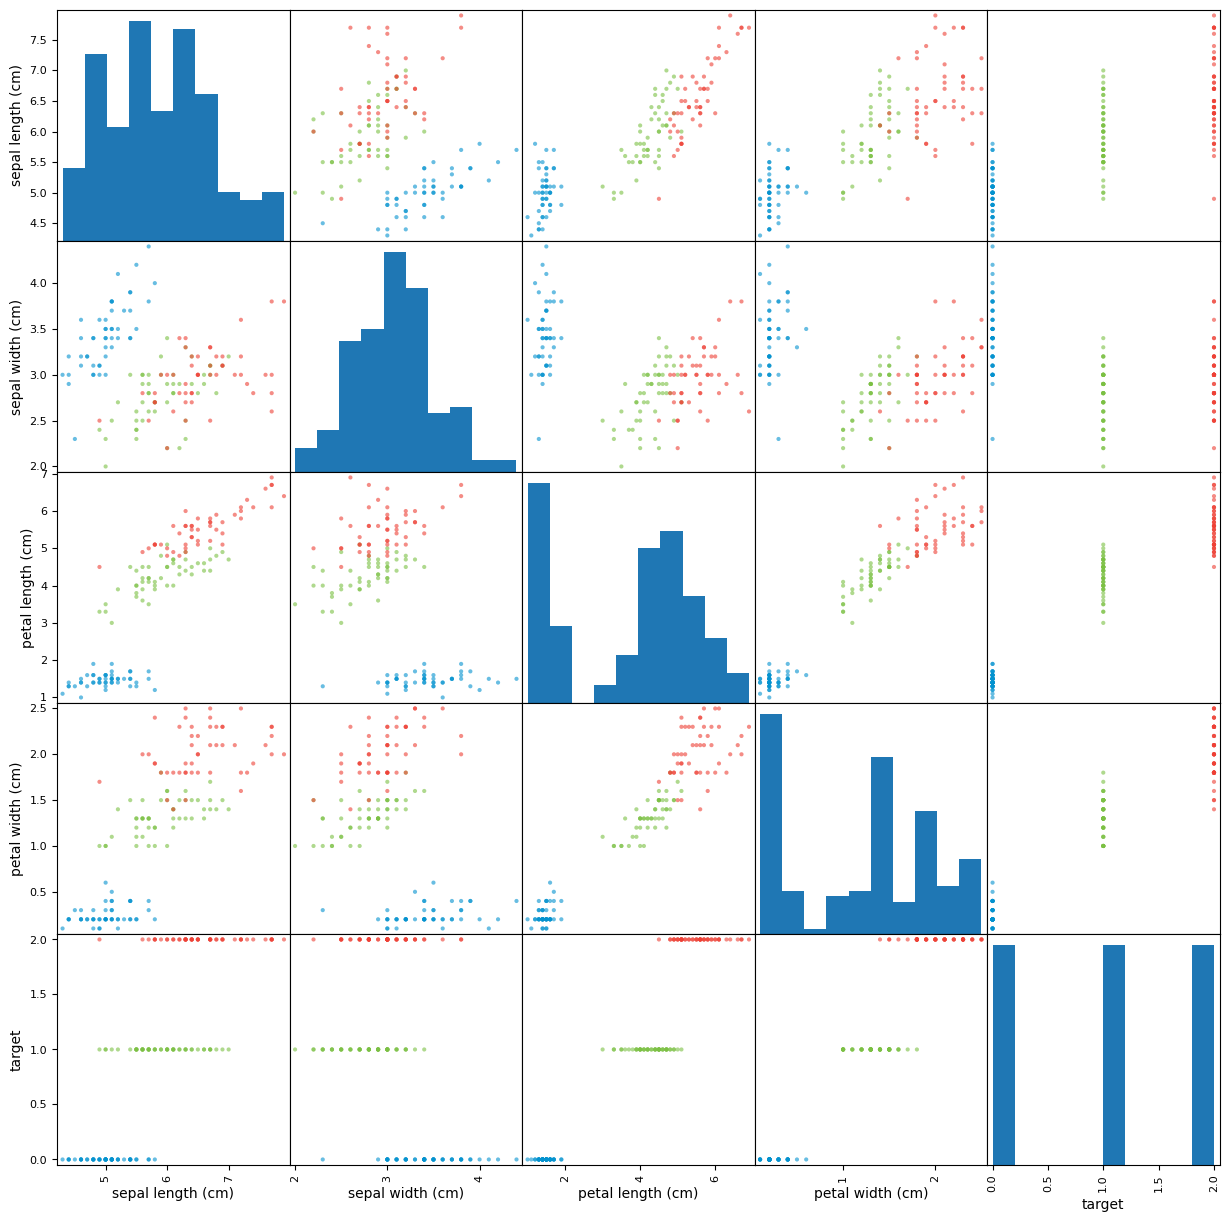

In [5]:
from pandas.plotting import scatter_matrix
import pandas as pd

iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data['target'] = iris['target']
color_wheel = {1: "#0392cf",
               2: "#7bc043",
               3: "#ee4035"}
colors = iris_data['target'].map(lambda x: color_wheel.get(x+1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')

Text(0, 0.5, 'sepal width')

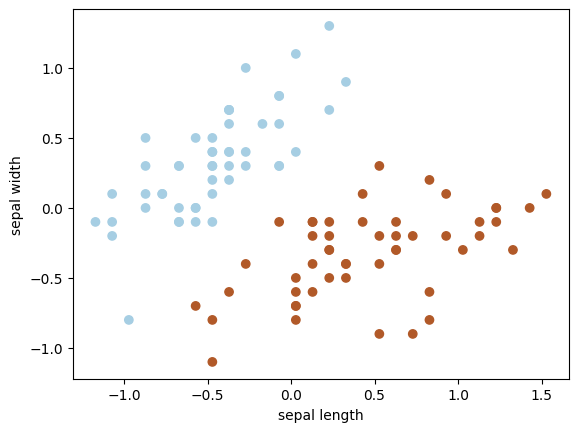

In [ ]:
# Select the first 2 flower classes (around 100 rows) and the first 2 features
# the two features are the first two columns: sepal_len and sepal_wid
sepal_len = iris['data'][:100,0]
sepal_wid = iris['data'][:100,1]
labels = iris['target'][:100]
# center the data by removing the mean: we won't need a bias in our model
sepal_len -= np.mean(sepal_len)
sepal_wid -= np.mean(sepal_wid)
# look at the two features:
plt.scatter(sepal_len,
            sepal_wid,
            c=labels,
            cmap=plt.cm.Paired)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
# the data set is linearly separable (we can draw a line to separate the two classes)

In [9]:
# Decision boundary: a line through the origin in the data space
def plot_sep(w1, w2, color='green'):
    '''
    Plot decision boundary hypothesis 
      w1 * sepal_len + w2 * sepal_wid = 0
    in input space, highlighting the hyperplane
    '''
    plt.scatter(sepal_len, 
                sepal_wid,
                c=labels,
                cmap=plt.cm.Paired)
    plt.title("Separation in Input Space")
    plt.ylim([-1.5,1.5])
    plt.xlim([-1.5,2])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    if w2 != 0:
        m = -w1/w2
        t = 1 if w2 > 0 else -1
        plt.plot(
            [-1.5,2.0], 
            [-1.5*m, 2.0*m], 
            '-y', 
            color=color)
        plt.fill_between(
            [-1.5, 2.0],
            [m*-1.5, m*2.0],
            [t*1.5, t*1.5],
            alpha=0.2,
            color=color)
    if w2 == 0: # decision boundary is vertical
        t = 1 if w1 > 0 else -1
        plt.plot([0, 0],
                 [-1.5, 2.0],
                 '-y',
                color=color)
        plt.fill_between(
            [0, 2.0*t],
            [-1.5, -2.0],
            [1.5, 2],
            alpha=0.2,
            color=color)

/var/folders/gy/yr6ync093l7cv6qw5tmxrtvr0000gn/T/ipykernel_87378/2785675085.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot(


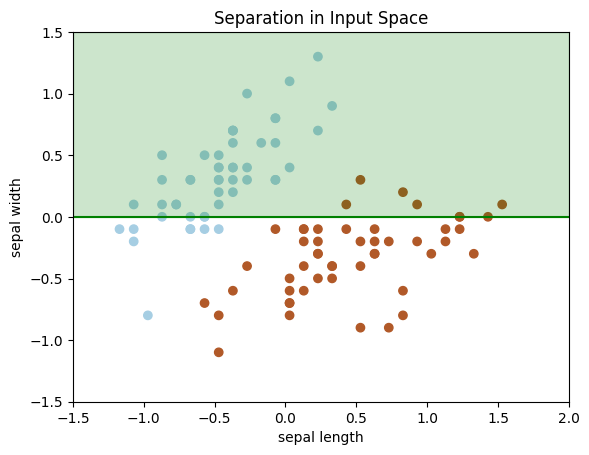

In [11]:
# Example hypothesis to see how the choices of w1 and w2 influence the decision
# boundary
plot_sep(0,1)
plt.show()

/var/folders/gy/yr6ync093l7cv6qw5tmxrtvr0000gn/T/ipykernel_87378/2785675085.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-y" (-> color='y'). The keyword argument will take precedence.
  plt.plot(


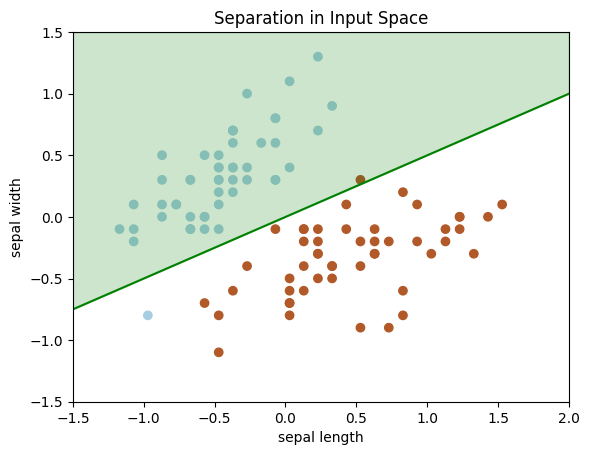

In [13]:
plot_sep(-0.5, 1)

In [14]:
# Predictions for the two models:
z1 = -0.5 * 0 + 1 * (-0.5)
y1 = 1 / (1 + np.exp(-z1))
print("Prediction for model 2: ", y1)

z2 = -1.5 * 0 + 3 * (-0.5)
y2 = 1 / (1 + np.exp(-z2))
print("Prediction for model 2: ", y2)

Prediction for model 2:  0.3775406687981454
Prediction for model 2:  0.18242552380635635
